In [1]:
import numpy as np
from matplotlib import pyplot as plt

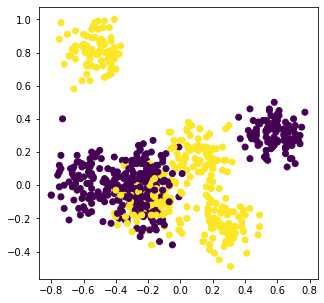

In [2]:
from script import make_dataset
plt.rcParams['figure.figsize'] = (5, 5)
xx, y = make_dataset()
x=xx/xx.max()

x=x.round(2)
plt.scatter(x[:, 0], x[:, 1], c=y[:, 0])
plt.show()

Epoch:  0 | train loss: 0.2746
Epoch:  200 | train loss: 0.2475
Epoch:  400 | train loss: 0.2475
Epoch:  600 | train loss: 0.2475
Epoch:  800 | train loss: 0.2475
Epoch:  1000 | train loss: 0.2475
Epoch:  1200 | train loss: 0.2475
Epoch:  1400 | train loss: 0.2475
Epoch:  1600 | train loss: 0.2475
Epoch:  1800 | train loss: 0.2475


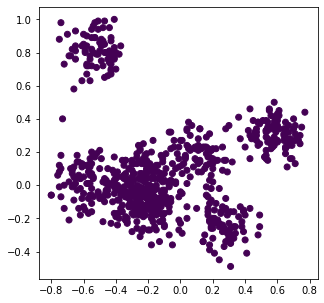

In [3]:
from script import make_model
model = make_model(x, y)

In [8]:
w = list(model.parameters())
wb = [[w[i].data.numpy().copy() for i in range(0, len(w), 2)],
      [w[i].data.numpy().copy() for i in range(1, len(w), 2)]]

# wb=np.array([
#     [np.array([[ff(k) for k in j] for j in i]) for i in wb[0]],
#     [np.array([ff(k) for k in i]) for i in wb[1]]
# ])

# wb, (a,b) = get_changed_weight(x,wb,model)
# wb, (a,b) = get_abs_layer_weight(x,wb,model)

import torch
from script import get_max_act, get_max_act_x, SNN, AlterLayer
# lll=get_max_act(x[:10],SNN,wb,t=1)

In [9]:
# snn_model=SNN(wb[0],wb[1],fin_act=lambda x:1/(1+np.exp(-x)),layer_type=Layer)
snn_model=SNN(wb[0],wb[1],fin_act=lambda x:1/(1+np.exp(-x)),layer_type=AlterLayer)

# snn_model.layers[1].U[1]=-2.71

iii=np.random.choice(x.shape[0])
xx = x.astype('float64')[iii]
t = 100
print(model(torch.from_numpy(xx.copy()).float()).data.numpy() * 1000//1/1000)
print(snn_model(xx, t) * 1000//1/1000)
print(snn_model.abstract_n(xx, t) * 1000//1/1000)

[0.449 0.55 ]
[0.449 0.55 ]
[0.449 0.55 ]


*** 0


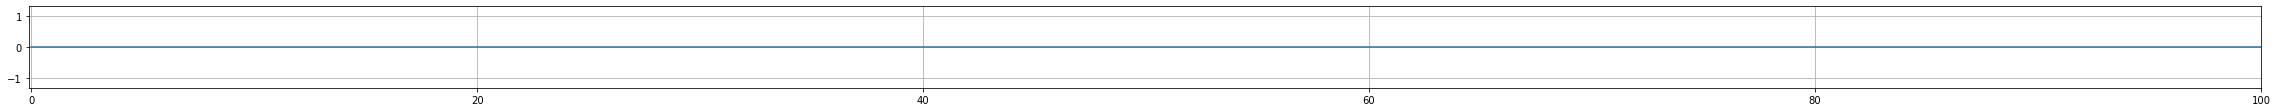

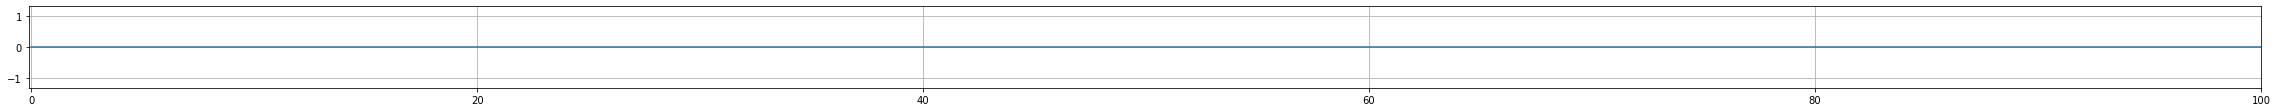

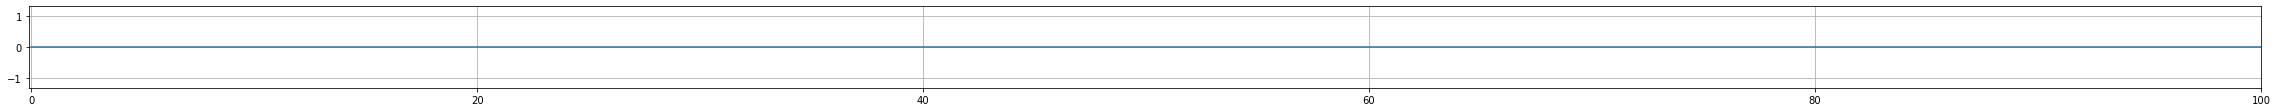

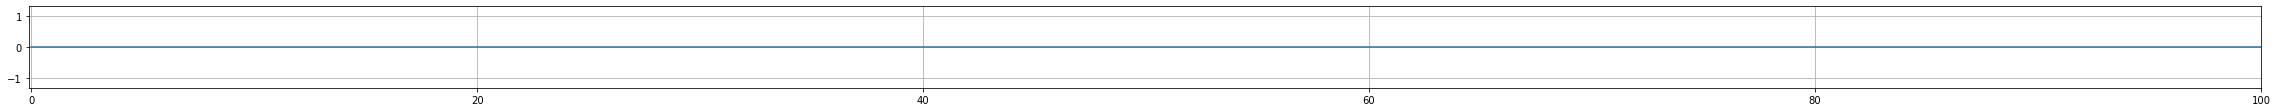

*** 1


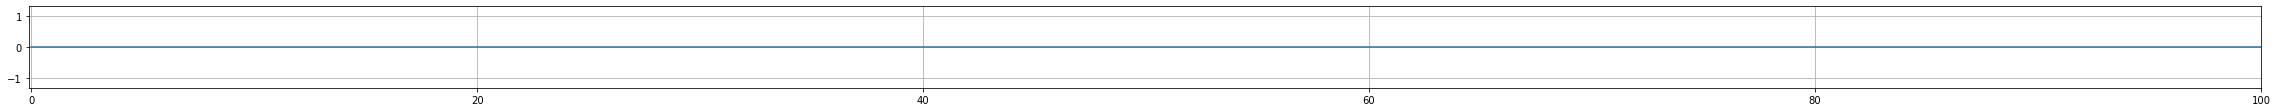

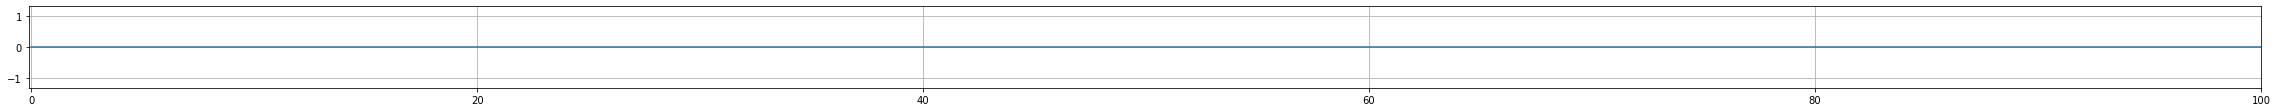

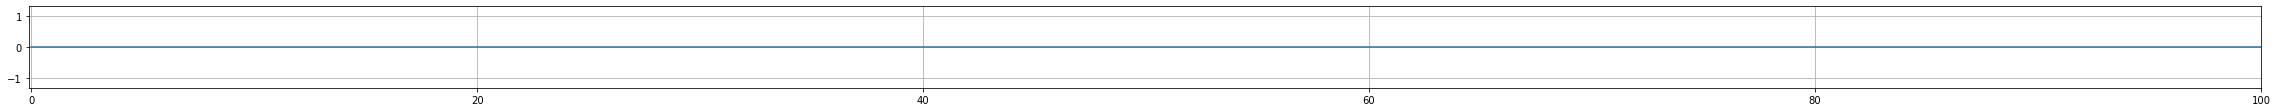

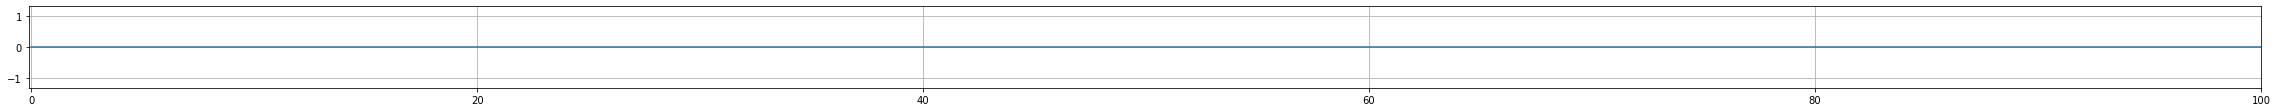

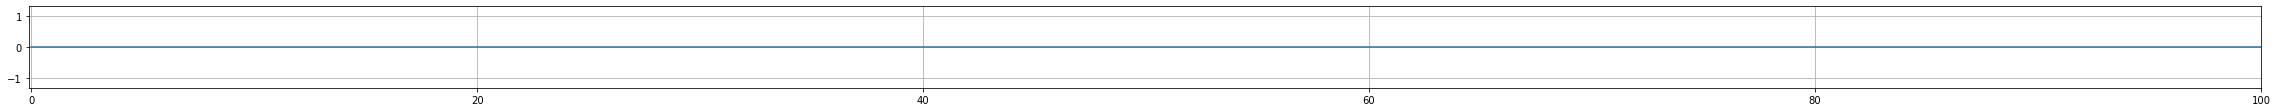

*** 2


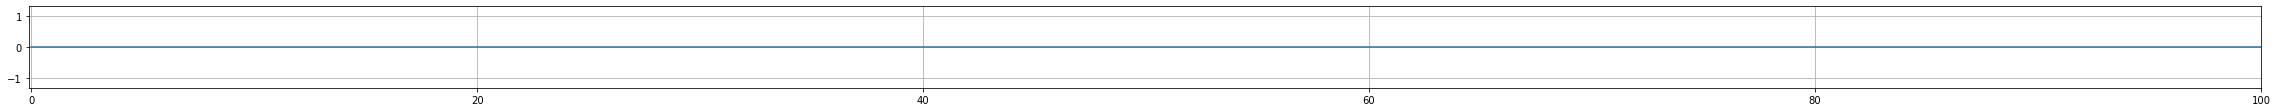

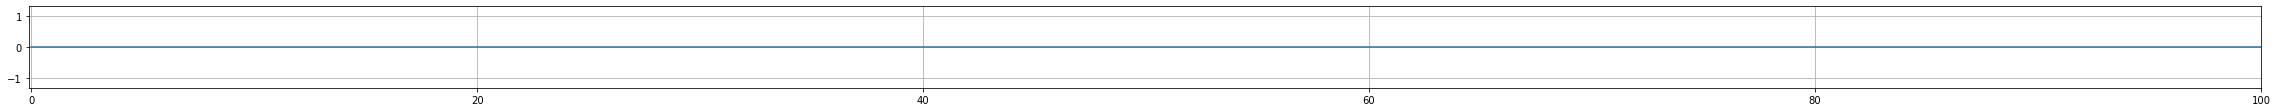

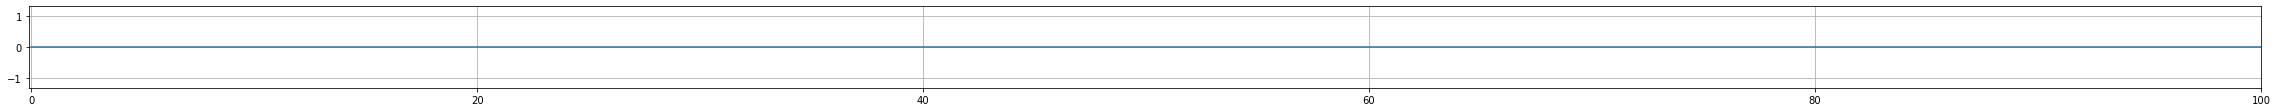

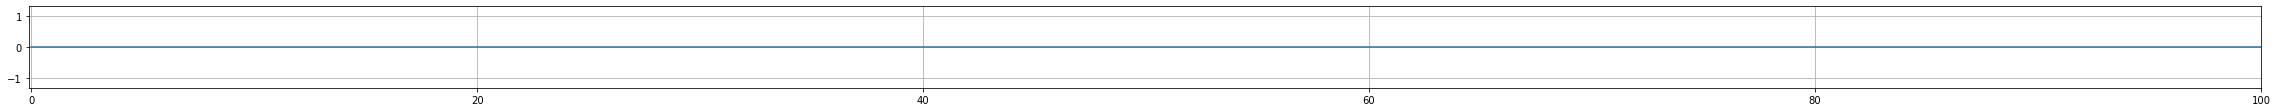

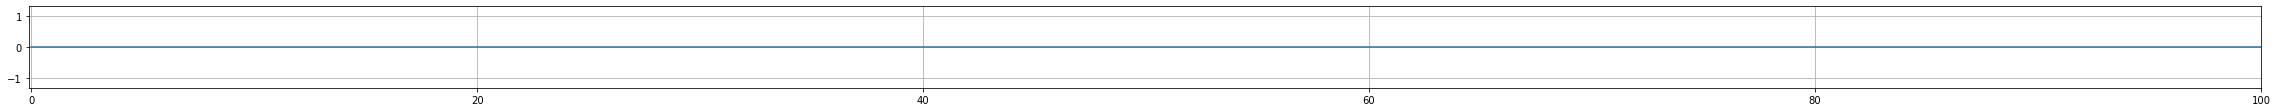

*** 3


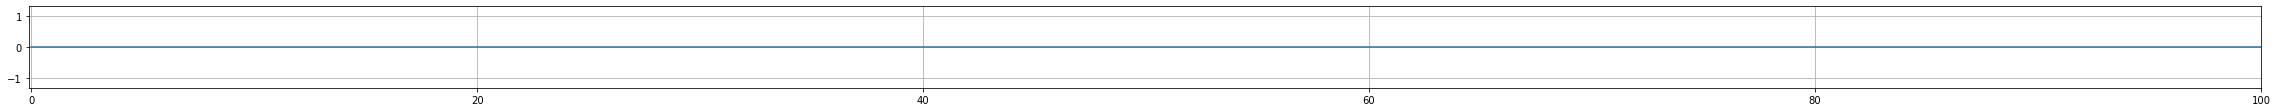

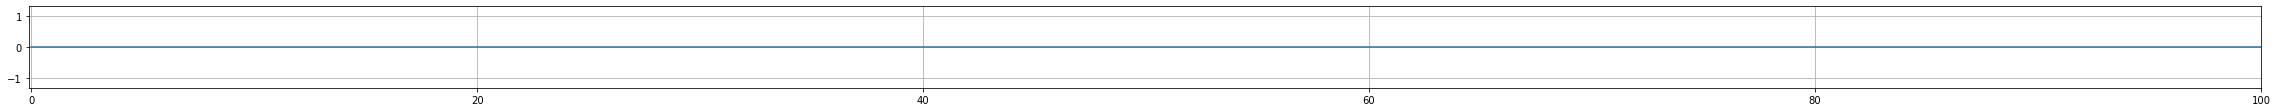

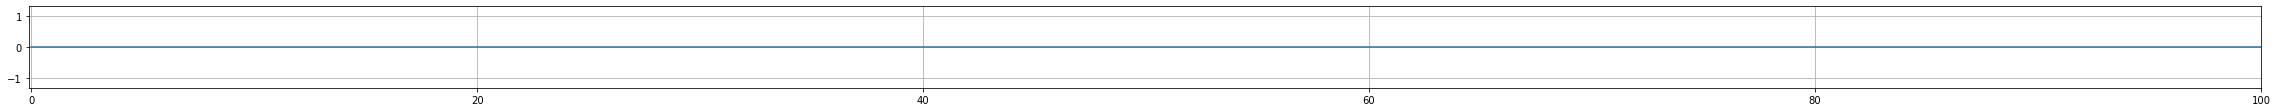

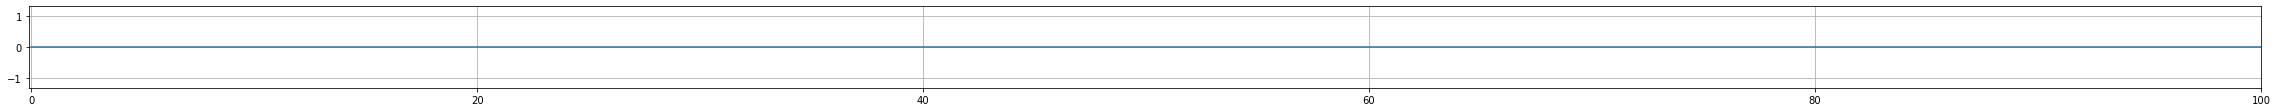

*** 4


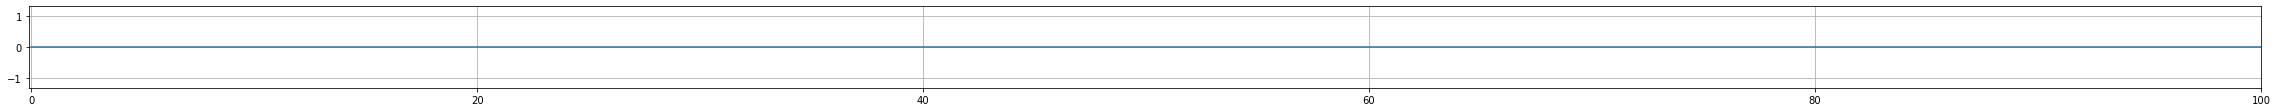

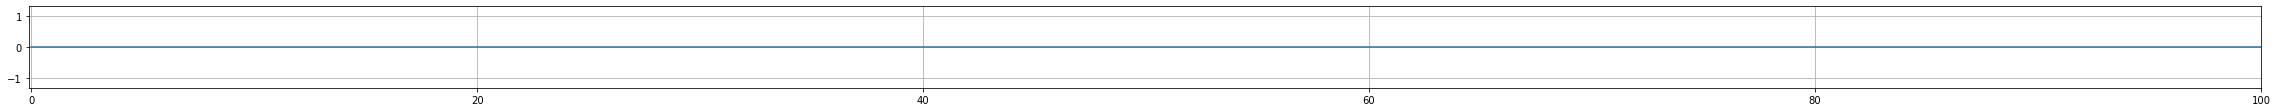

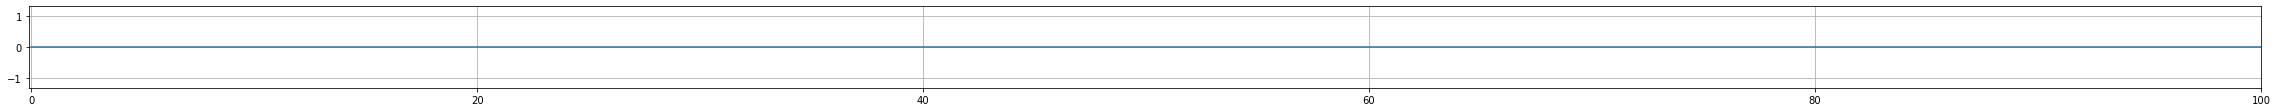

*** 5


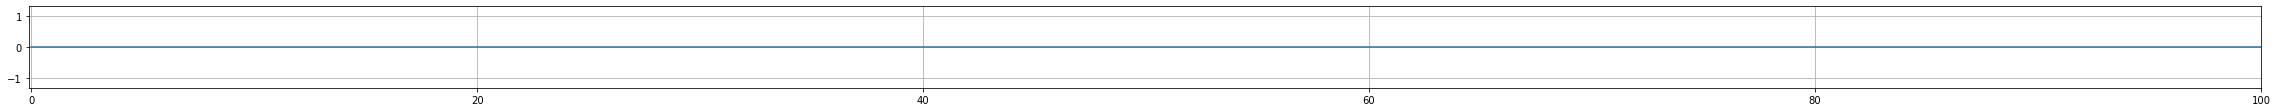

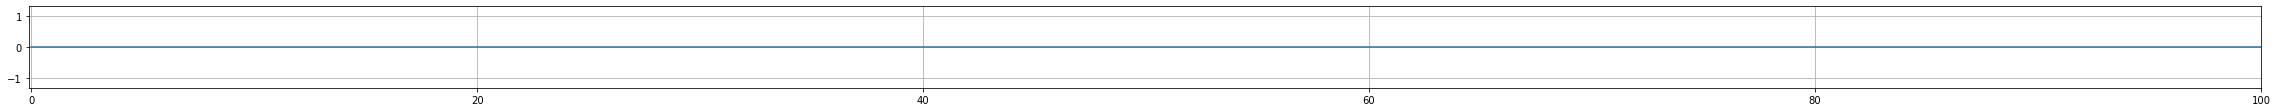

In [11]:
import sys, importlib
importlib.reload(sys.modules['script'])

# from script import plot_n_comparison
# plot_n_comparison(snn_model,xx, t, 0, ylim=100, xlim=t/10)#, xmlim=190, ymlim=0

# from script import plot_r_comparison
# plot_r_comparison(snn_model,xx, t, 1, ylim=0.3, xlim=t/20)#, xmlim=190, ymlim=0

# from script import plot_r_delta_comparison
# plot_r_delta_comparison(snn_model,model,xx, t, l=4, ylim=0.05, xlim=500, xmlim=0, ymlim=0)#

# from script import plot_v_comparison
# plot_v_comparison(snn_model,xx, t, 1, ylim=1.1, xlim=500, xmlim=0, ymlim=-1.1)#

from script import plot_delta_comparison
plot_delta_comparison(snn_model, xx, t, l=None, ylim=1.3, xlim=t, nnn=False)

In [ ]:
import plotly.express as px
n=5
a=[1,0]
b=[1,0]
for deno in np.array(range(1,200+1)).round(n+2):
    for j in (np.array(range(0,deno+1)).round(n+2)/deno).round(n+2):
        if j not in a:
            a.append(j)
            b.append(deno)
aa=np.array([a,b])
aa=aa.T[aa[0].argsort()].T

ff=lambda v: np.floor(v)+aa[0][np.argmin(np.abs(aa[0] - (v-np.floor(v))))]
px.scatter(x=aa[0],y=aa[1])